# **MINERIA DE DATOS** 🔎
Maester U. en Big Data y Ciencia de datos

DATOS CLIMATOLOGICOS DE ESPAÑA POR PROVINCIA



*   **Danilo Plazas Irreño**

# INTRODUCCIÓN

La información presentada en este documento es la descripción secuencial de las metodologías implementadas en la base de datos de acceso público sobre el clima en españa en cada una de sus provincias.

# CARGUE DE DATOS

Se realizo el cargue del set de datos, los cuales fueron descargados del siguiente link:
https://opendata.aemet.es/centrodedescargas/productosAEMET?

Posteriormente asignamos permisos a colab para acceder a nuestro drive en donde se encuentra nuestro dataset y realizamos el cargue de las diferentes librerías necesarias para el análisis y preparación de los datos.

Para un correcto funcionamiento de pandas-profiling se deben instalar las siguientes versiones de librerías:

In [1]:
import matplotlib
print(matplotlib.__version__)

3.7.1


In [4]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
%matplotlib inline
plt.style.use("ggplot")
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
import seaborn as sns
from pandas_profiling import ProfileReport

Leemos el archivo CSV

In [9]:
path = os.getcwd()
path = path.replace("\\", "\\\\")
path = path.replace("\\\\", "/")
path = "/".join(path.split("/")[:-1]) + "/Data/Data_Climatologica/Diaria/"

In [120]:
# read the data
df = pd.read_json(path + 'A_CORUÑA_D.json', encoding="latin")

In [12]:
df.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,2020-01-01,1387,A CORUÑA,A CORUÑA,58,"9,0","0,0","6,4",23:40,"11,5",14:10,16.0,"1,9","5,3",05:50,"6,8","1025,4",Varias,"1021,7",24
1,2020-01-02,1387,A CORUÑA,A CORUÑA,58,"9,3","0,2","6,2",04:10,"12,4",Varias,22.0,"2,8","11,4",14:20,"0,0","1021,7",00,"1019,5",16
2,2020-01-03,1387,A CORUÑA,A CORUÑA,58,"11,9","0,0","8,8",23:59,"15,0",12:40,17.0,"2,5","9,2",03:30,"4,5","1029,4",22,"1020,6",02
3,2020-01-04,1387,A CORUÑA,A CORUÑA,58,"9,4","0,0","5,7",08:10,"13,1",14:30,99.0,"0,8","4,7",Varias,"7,2","1030,5",10,"1026,5",24
4,2020-01-05,1387,A CORUÑA,A CORUÑA,58,"8,2","0,0","4,4",07:50,"11,9",13:30,16.0,"1,7","5,8",07:20,"8,5","1026,5",00,"1020,8",22


Comprobamos los tipos y la cantidad de instacias que tenemos:

In [13]:
print('Nuestro dataset tiene ' + str(df.shape[0]) + ' registros y ' + str(df.shape[1]) + ' columnas \n')
print(df.dtypes)

Nuestro dataset tiene 1155 registros y 20 columnas 

fecha           object
indicativo       int64
nombre          object
provincia       object
altitud          int64
tmed            object
prec            object
tmin            object
horatmin        object
tmax            object
horatmax        object
dir            float64
velmedia        object
racha           object
horaracha       object
sol             object
presMax         object
horaPresMax     object
presMin         object
horaPresMin     object
dtype: object


Comprobamos de todas las variables, que subconjunto son númericas y la cantidad que tenemos de estas:

In [14]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print('Tenemos' + ' ' +str(len(numeric_cols)) + ' columnas de tipo númerico que son: \n')
print(numeric_cols)

Tenemos 3 columnas de tipo númerico que son: 

['indicativo' 'altitud' 'dir']


Comprobamos de todas las variables, que subconjunto NO son númericas y la cantidad que tenemos de estas:

In [15]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print('Tenemos' + ' ' +str(len(non_numeric_cols)) + ' columnas de tipo NO númerico que son: \n')
print(non_numeric_cols)

Tenemos 17 columnas de tipo NO númerico que son: 

['fecha' 'nombre' 'provincia' 'tmed' 'prec' 'tmin' 'horatmin' 'tmax'
 'horatmax' 'velmedia' 'racha' 'horaracha' 'sol' 'presMax' 'horaPresMax'
 'presMin' 'horaPresMin']


Generamos reporte de perfilamiento de datos con el fin de realizar un analisis exploratorio del archivo de entrada que nos permite evaluar el estado de los datos sin ninguna intervención previa. Este archivo .html se genera en la ruta origen del drive en donde se abrio este notebook de colab, de igual forma se adjuntara el archivo en el entregable.

In [121]:
#profile = ProfileReport(df, minimal=True)
#profile.to_file(output_file="df_clima_prof.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 497.54it/s]


El perfilamiento de datos arroja los resultados en el archivo anexo

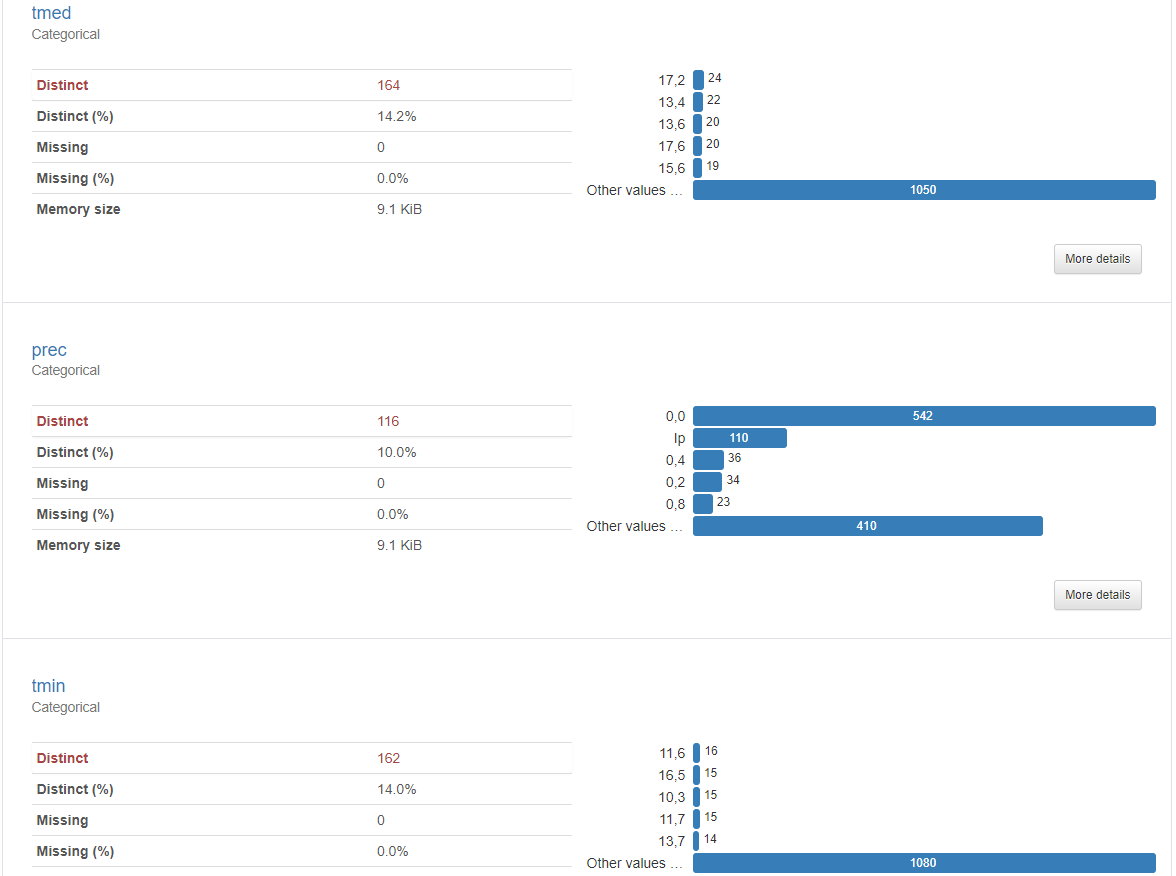

# MISSING VALUES

## Missing Data Heatmap
Podemos visualizar los datos que faltan a través del mapa de calor.

<Axes: >

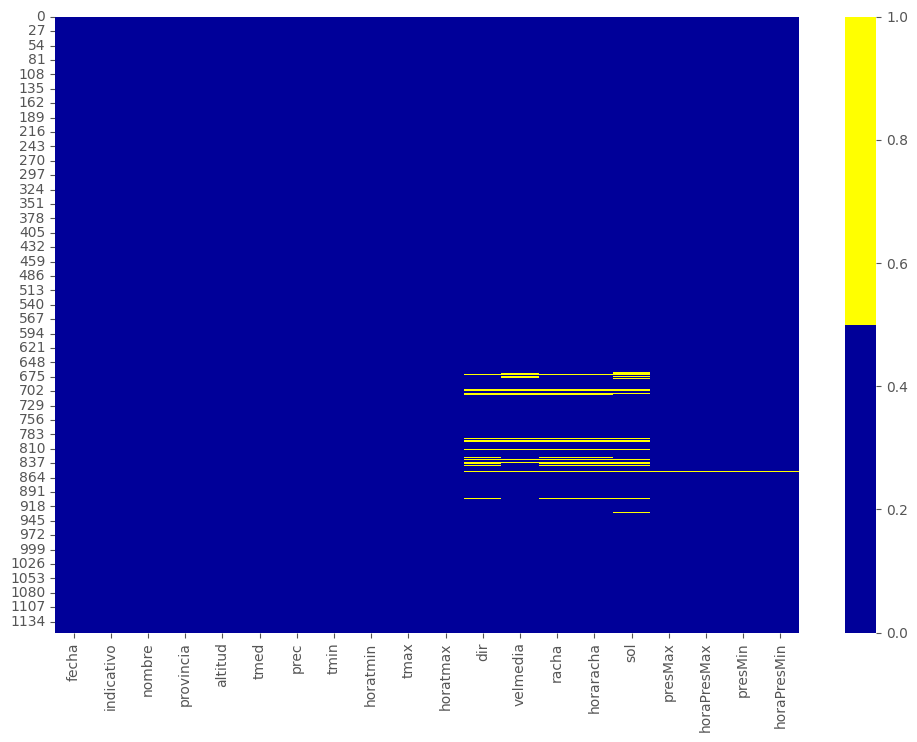

In [16]:
cols = df.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

El gráfico anterior muestra los patrones de datos que faltan de todas las columnas. 
El eje horizontal muestra el nombre del atributo de entrada; el eje vertical muestra el número de observaciones/filas; el color amarillo representa los datos que faltan, mientras que el color azul, en caso contrario.
Detallamos que todas las características tienen muy pocos valores perdidos o inclusive no tienen.

## Missing Data Percentage List

A continuación se muestra el listado con el porcentaje de los valores faltantes, para este caso tome 3 decimas ya que hay unos campos que tienen un porcentaje de faltantes muy bajo pero que igual los tiene:

In [17]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 7)))

fecha - 0.0%
indicativo - 0.0%
nombre - 0.0%
provincia - 0.0%
altitud - 0.0%
tmed - 0.0%
prec - 0.0%
tmin - 0.0%
horatmin - 0.0%
tmax - 0.0%
horatmax - 0.0%
dir - 2.5974026%
velmedia - 2.8571429%
racha - 2.5974026%
horaracha - 2.5974026%
sol - 3.3766234%
presMax - 0.3463203%
horaPresMax - 0.3463203%
presMin - 0.3463203%
horaPresMin - 0.3463203%


# ¿Qué hacer?
A continuación se describen en los siguientes métodos más comunes:
Si lo aplicamos, a qué columna se lo aplicamos y el por qué.

##  Dejar o no dejar  la instancia

Observamos que algunas columnas tiene un porcentaje menor a un 4 % de valores faltantes es bastante pequeño, no se eliminara ningun registro que contenga un nulo en alguno de sus registros ya que eliminariamos el día.



## Dejar o no dejar la característica

Similar a la anterior, sólo lo hacemos cuando estamos seguros de que esta característica no proporciona información útil.

No se eliminará ninguna caracteristica ya que tiene su información completa o con muy pocos valores faltantes.

A continuación también se evidencia cierta correlación entre las variables descritas anteriormente, teniendo un tono más naranja claro, siendo blanco variables totalmente identicas.

**El siguiente bloque de código solo se ejecuto una vez con fines practicos, ya que transforma las columnas categoricas en un valor numerico correspondiente para realizar la validación de la correlación, y esta columna es importante para el analisis y por el momento necesitamos la descripción, después de esta ejecución de después de generar el mapa de calor se debe ejecutar nuevamente los pasos anteriores ya que se modifico los tipos de datos de sus caracteristicas**

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# 
# df['fecha'] = labelencoder.fit_transform(df['fecha'])
# df['nombre'] = labelencoder.fit_transform(df['nombre'])
# df['provincia'] = labelencoder.fit_transform(df['provincia'])
# df['tmed'] = labelencoder.fit_transform(df['tmed'])
# df['prec'] = labelencoder.fit_transform(df['prec'])
# df['tmin'] = labelencoder.fit_transform(df['tmin'])
# df['horatmin'] = labelencoder.fit_transform(df['horatmin'])
# df['tmax'] = labelencoder.fit_transform(df['tmax'])
# df['horatmax'] = labelencoder.fit_transform(df['horatmax'])
# df['velmedia'] = labelencoder.fit_transform(df['velmedia'])
# df['racha'] = labelencoder.fit_transform(df['racha'])
# df['horaracha'] = labelencoder.fit_transform(df['horaracha'])
# df['sol'] = labelencoder.fit_transform(df['sol'])
# df['presMax'] = labelencoder.fit_transform(df['presMax'])
# df['horaPresMax'] = labelencoder.fit_transform(df['horaPresMax'])
# df['presMin'] = labelencoder.fit_transform(df['presMin'])
# df['horaPresMin'] = labelencoder.fit_transform(df['horaPresMin'])


In [ ]:
corr = df.corr(method = "pearson")
%pylab inline
pyplot.figure(figsize=(12,12))
sns.heatmap(corr, square = True, xticklabels=1, yticklabels=1)

Procedemos a eliminar las variables UCR Category y Category Description por la razones expuestas anteriormente:

# TRANSFORMACION NOMBRE DE COLUMNAS

Se renombramos las columnas para dar un estandar de nombramiento y facilitar el manejo.

In [18]:
df.columns = ['FECHA', 'INDICATIVO', 'NOMBRE', 'PROVINCIA', 'ALTITUD', 'TEMP_MED', 'PREC', 'TEMP_MIN', 'HORA_TEMP_MIN',
              'TEMP_MAX', 'HORA_TEMP_MAX', 'DIR', 'VEL_MEDIA', 'RACHA', 'HORA_RACHA', 'SOL', 'PRES_MAX', 'HORA_PRES_MAX', 
              'PRES_MIN', 'HORA_PRES_MIN']

# REEMPLAZAR VALORES

In [67]:
df['PRES_MAX'].unique()

array([1025.4, 1021.7, 1029.4, 1030.5, 1026.5, 1024.4, 1025.7, 1023.4,
       1022.6, 1027.2, 1026.1, 1019.2, 1005.7, 1011.7, 1014.2, 1023.7,
       1019.3, 1029.9, 1024.9, 1018.5, 1011.2, 1012.4, 1011.6, 1012.9,
       1010.6, 1013.7, 1012.7, 1012.5, 1015.2, 1018.6, 1022.5, 1026. ,
       1024.3, 1017.4, 1020.1, 1023.1, 1019.9, 1017.5, 1017.9, 1014.6,
       1028. , 1029.3, 1027.7, 1023.6, 1027.4, 1016.6, 1016.1, 1004. ,
       1001.4, 1009.1, 1010.8, 1011.5, 1010.3, 1021.5, 1021.6, 1022.1,
       1024.1, 1021. , 1018.7, 1017.7, 1020.2, 1020.4, 1019.1, 1006.5,
       1005.4, 1009.8, 1011.8, 1009.9, 1009.3, 1008. , 1013.4, 1014.7,
       1014.5, 1008.9, 1008.3, 1006.2, 1007.4, 1014.9, 1011. , 1014. ,
       1014.1, 1013. , 1002.1, 1002.4, 1006.4, 1007.7, 1005.5, 1009.5,
       1012.6, 1005.3, 1007.8, 1005.8, 1006.1, 1011.9, 1004.1, 1009.4,
       1013.2, 1012.2, 1006.9, 1004.4, 1000.9, 1003.8,  998.8, 1007.5,
       1016.7, 1017.1, 1022. , 1024.8, 1020.8, 1020.3, 1016.8, 1007.3,
      

In [20]:
df[df['FECHA'] == "2021-10-19"].head()

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TEMP_MED,PREC,TEMP_MIN,HORA_TEMP_MIN,TEMP_MAX,HORA_TEMP_MAX,DIR,VEL_MEDIA,RACHA,HORA_RACHA,SOL,PRES_MAX,HORA_PRES_MAX,PRES_MIN,HORA_PRES_MIN
657,2021-10-19,1387,A CORUÑA,A CORUÑA,58,"21,9","3,0","17,0",05:50,"26,8",13:40,22.0,NaN,"17,2",14:30,"7,9","1012,2",01,"1009,2",Varias


In [21]:
df[df['DIR'].isnull()].head()

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TEMP_MED,PREC,TEMP_MIN,HORA_TEMP_MIN,TEMP_MAX,HORA_TEMP_MAX,DIR,VEL_MEDIA,RACHA,HORA_RACHA,SOL,PRES_MAX,HORA_PRES_MAX,PRES_MIN,HORA_PRES_MIN
572,2021-07-26,1387,A CORUÑA,A CORUÑA,58,"19,4","0,2","17,3",Varias,"21,5",11:20,NaN,"1,9",NaN,NaN,NaN,"1011,3",10,"1008,9",03
666,2021-10-28,1387,A CORUÑA,A CORUÑA,58,"15,2","13,6","12,4",05:10,"18,1",14:50,NaN,NaN,NaN,NaN,NaN,"1008,8",00,"997,4",18
671,2021-11-02,1387,A CORUÑA,A CORUÑA,58,"13,0","21,2","10,3",23:20,"15,7",11:20,NaN,NaN,NaN,NaN,NaN,"1006,0",01,"1000,6",15
679,2021-11-10,1387,A CORUÑA,A CORUÑA,58,"12,7","0,0","9,2",08:20,"16,2",13:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,2021-11-30,1387,A CORUÑA,A CORUÑA,58,"12,7","1,0","10,5",05:40,"14,9",10:50,NaN,NaN,NaN,NaN,NaN,"1020,2",11,"1017,0",01


In [22]:
df.fillna(method="ffill", inplace=True)
df.fillna(method="bfill", inplace=True)
df['PREC'] = df['PREC'].replace(['Ip'], '0,0')

In [23]:
print(df.dtypes)

FECHA             object
INDICATIVO         int64
NOMBRE            object
PROVINCIA         object
ALTITUD            int64
TEMP_MED          object
PREC              object
TEMP_MIN          object
HORA_TEMP_MIN     object
TEMP_MAX          object
HORA_TEMP_MAX     object
DIR              float64
VEL_MEDIA         object
RACHA             object
HORA_RACHA        object
SOL               object
PRES_MAX          object
HORA_PRES_MAX     object
PRES_MIN          object
HORA_PRES_MIN     object
dtype: object


**Realizando nuevamente el porcentaje de valores faltantes de todas las variables se obtiene:**

In [24]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 7)))

FECHA - 0.0%
INDICATIVO - 0.0%
NOMBRE - 0.0%
PROVINCIA - 0.0%
ALTITUD - 0.0%
TEMP_MED - 0.0%
PREC - 0.0%
TEMP_MIN - 0.0%
HORA_TEMP_MIN - 0.0%
TEMP_MAX - 0.0%
HORA_TEMP_MAX - 0.0%
DIR - 0.0%
VEL_MEDIA - 0.0%
RACHA - 0.0%
HORA_RACHA - 0.0%
SOL - 0.0%
PRES_MAX - 0.0%
HORA_PRES_MAX - 0.0%
PRES_MIN - 0.0%
HORA_PRES_MIN - 0.0%


# TRANSFORMACION TIPOS DE DATOS

Realizaremos las siguientes transformaciónes en los datos:
- Convertimos las variables de tiempo a tipo "datetime"
- Las variables que estén tipo float y no tengan ningun valor decimal se convertiran en enteros.
- Normalización y homologación de los valores en campos categoricos con el fin de agrupar y estandarizar.

In [25]:
df["FECHA"] = pd.to_datetime(df["FECHA"])
df["TEMP_MED"] = df["TEMP_MED"].str.replace(",",".").astype(float)
df["PREC"] = df["PREC"].str.replace(",",".").astype(float)
df["TEMP_MIN"] = df["TEMP_MIN"].str.replace(",",".").astype(float)
df["TEMP_MAX"] = df["TEMP_MAX"].str.replace(",",".").astype(float)
df["VEL_MEDIA"] = df["VEL_MEDIA"].str.replace(",",".").astype(float)
df["RACHA"] = df["RACHA"].str.replace(",",".").astype(float)
df["SOL"] = df["SOL"].str.replace(",",".").astype(float)
df["PRES_MAX"] = df["PRES_MAX"].str.replace(",",".").astype(float)
df["PRES_MIN"] = df["PRES_MIN"].str.replace(",",".").astype(float)

In [26]:
print(df.dtypes)

FECHA            datetime64[ns]
INDICATIVO                int64
NOMBRE                   object
PROVINCIA                object
ALTITUD                   int64
TEMP_MED                float64
PREC                    float64
TEMP_MIN                float64
HORA_TEMP_MIN            object
TEMP_MAX                float64
HORA_TEMP_MAX            object
DIR                     float64
VEL_MEDIA               float64
RACHA                   float64
HORA_RACHA               object
SOL                     float64
PRES_MAX                float64
HORA_PRES_MAX            object
PRES_MIN                float64
HORA_PRES_MIN            object
dtype: object


In [27]:
df

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TEMP_MED,PREC,TEMP_MIN,HORA_TEMP_MIN,TEMP_MAX,HORA_TEMP_MAX,DIR,VEL_MEDIA,RACHA,HORA_RACHA,SOL,PRES_MAX,HORA_PRES_MAX,PRES_MIN,HORA_PRES_MIN
0,2020-01-01,1387,A CORUÑA,A CORUÑA,58,9.0,0.0,6.4,23:40,11.5,14:10,16.0,1.9,5.3,05:50,6.8,1025.4,Varias,1021.7,24
1,2020-01-02,1387,A CORUÑA,A CORUÑA,58,9.3,0.2,6.2,04:10,12.4,Varias,22.0,2.8,11.4,14:20,0.0,1021.7,00,1019.5,16
2,2020-01-03,1387,A CORUÑA,A CORUÑA,58,11.9,0.0,8.8,23:59,15.0,12:40,17.0,2.5,9.2,03:30,4.5,1029.4,22,1020.6,02
3,2020-01-04,1387,A CORUÑA,A CORUÑA,58,9.4,0.0,5.7,08:10,13.1,14:30,99.0,0.8,4.7,Varias,7.2,1030.5,10,1026.5,24
4,2020-01-05,1387,A CORUÑA,A CORUÑA,58,8.2,0.0,4.4,07:50,11.9,13:30,16.0,1.7,5.8,07:20,8.5,1026.5,00,1020.8,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2023-02-24,1387,A CORUÑA,A CORUÑA,58,6.0,11.2,2.5,06:40,9.4,13:00,26.0,2.2,6.7,15:30,0.5,1006.6,00,1001.5,24
1151,2023-02-25,1387,A CORUÑA,A CORUÑA,58,8.9,0.4,6.7,00:20,11.1,14:40,6.0,1.9,4.7,06:10,0.8,1002.9,24,998.4,15
1152,2023-02-26,1387,A CORUÑA,A CORUÑA,58,9.6,0.0,6.1,06:40,13.2,11:30,99.0,4.2,13.9,Varias,5.8,1011.1,24,1002.9,00
1153,2023-02-27,1387,A CORUÑA,A CORUÑA,58,8.6,0.0,6.5,Varias,10.7,12:30,6.0,6.4,13.9,10:50,10.2,1018.0,24,1011.1,00


# OUTLIERS (DATOS FUERA DE RANGO)

- A continuación mediante un histograma, se evidencia que con respecto a las **fechas** no existe outliers ya que los datos deben corresponder desde el 2020 hasta la actualidad.

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<Axes: >

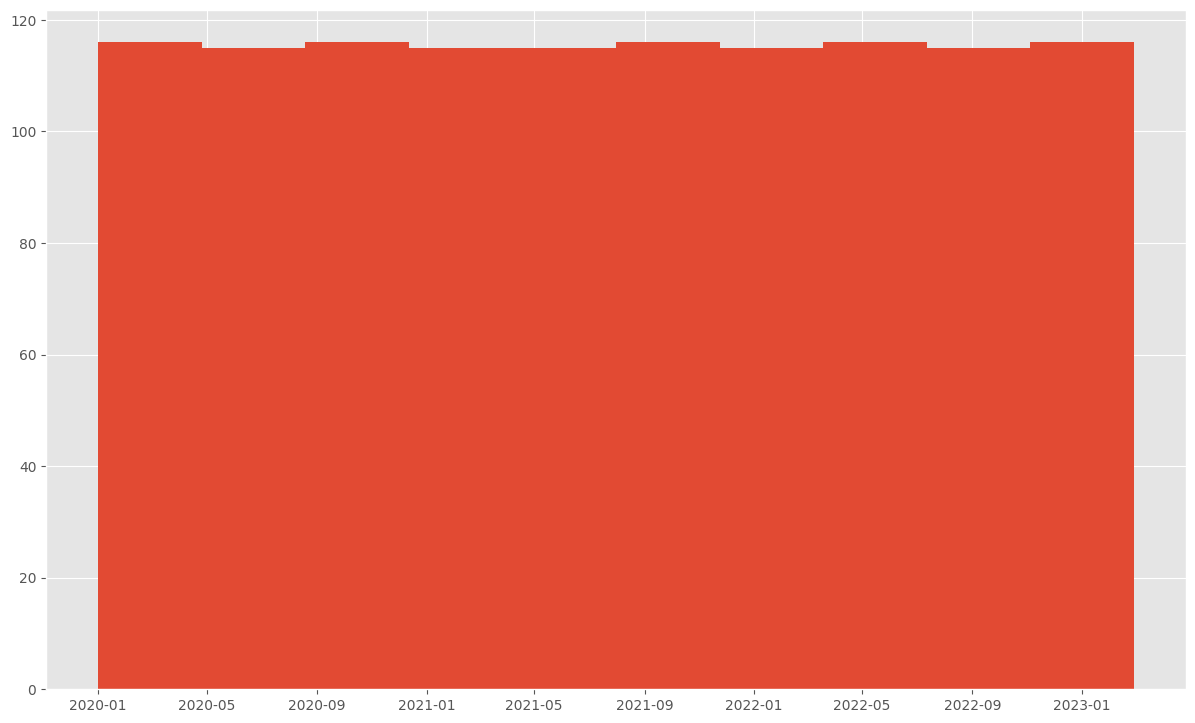

In [28]:
%pylab inline
plt.figure(figsize=(50, 30))

ax1 = plt.subplot(331)
df['FECHA'].hist(bins=10)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<Axes: >

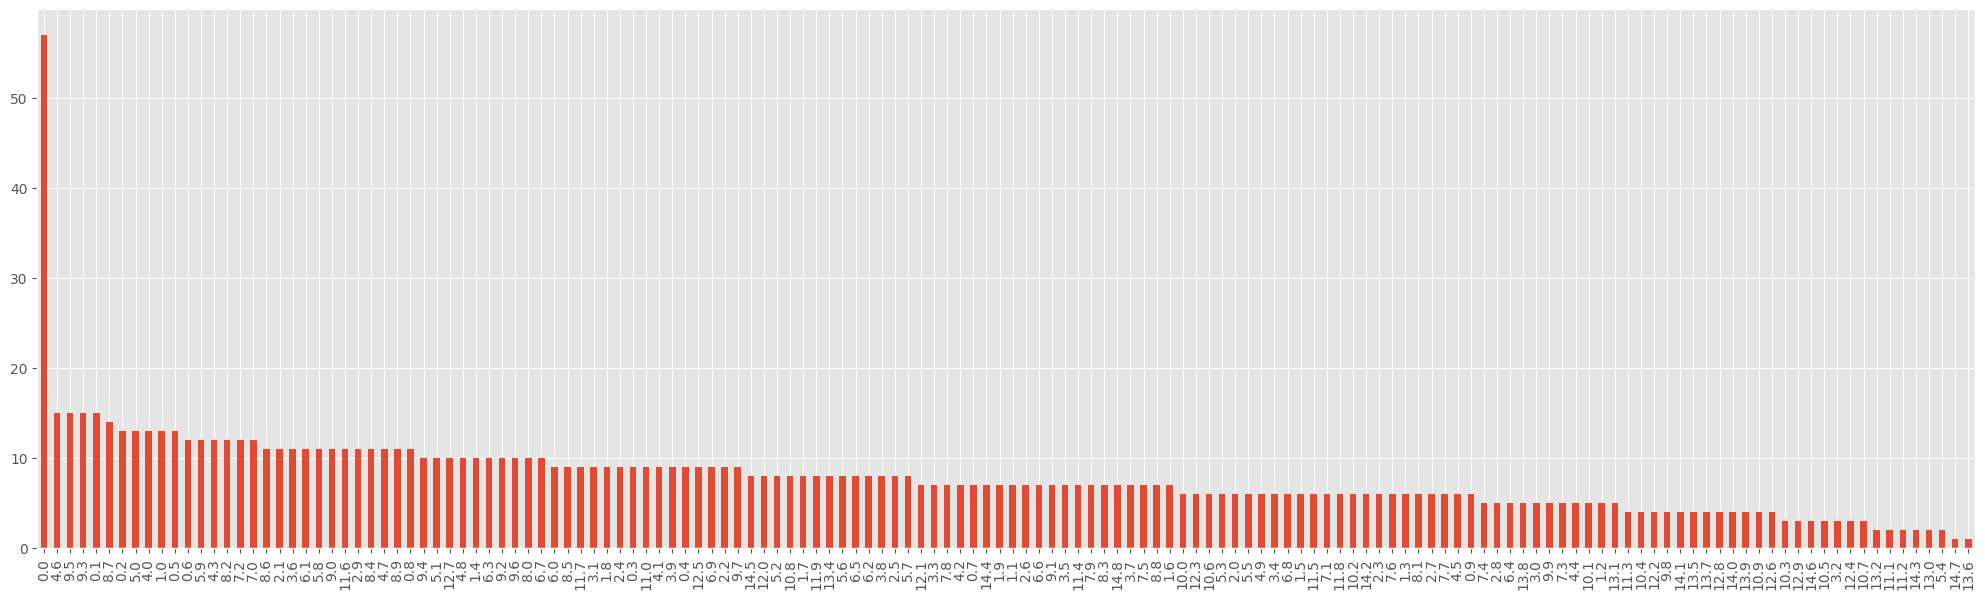

In [33]:
%pylab inline
pyplot.figure(figsize=(25,7))
df['SOL'].value_counts().plot.bar()

<Axes: >

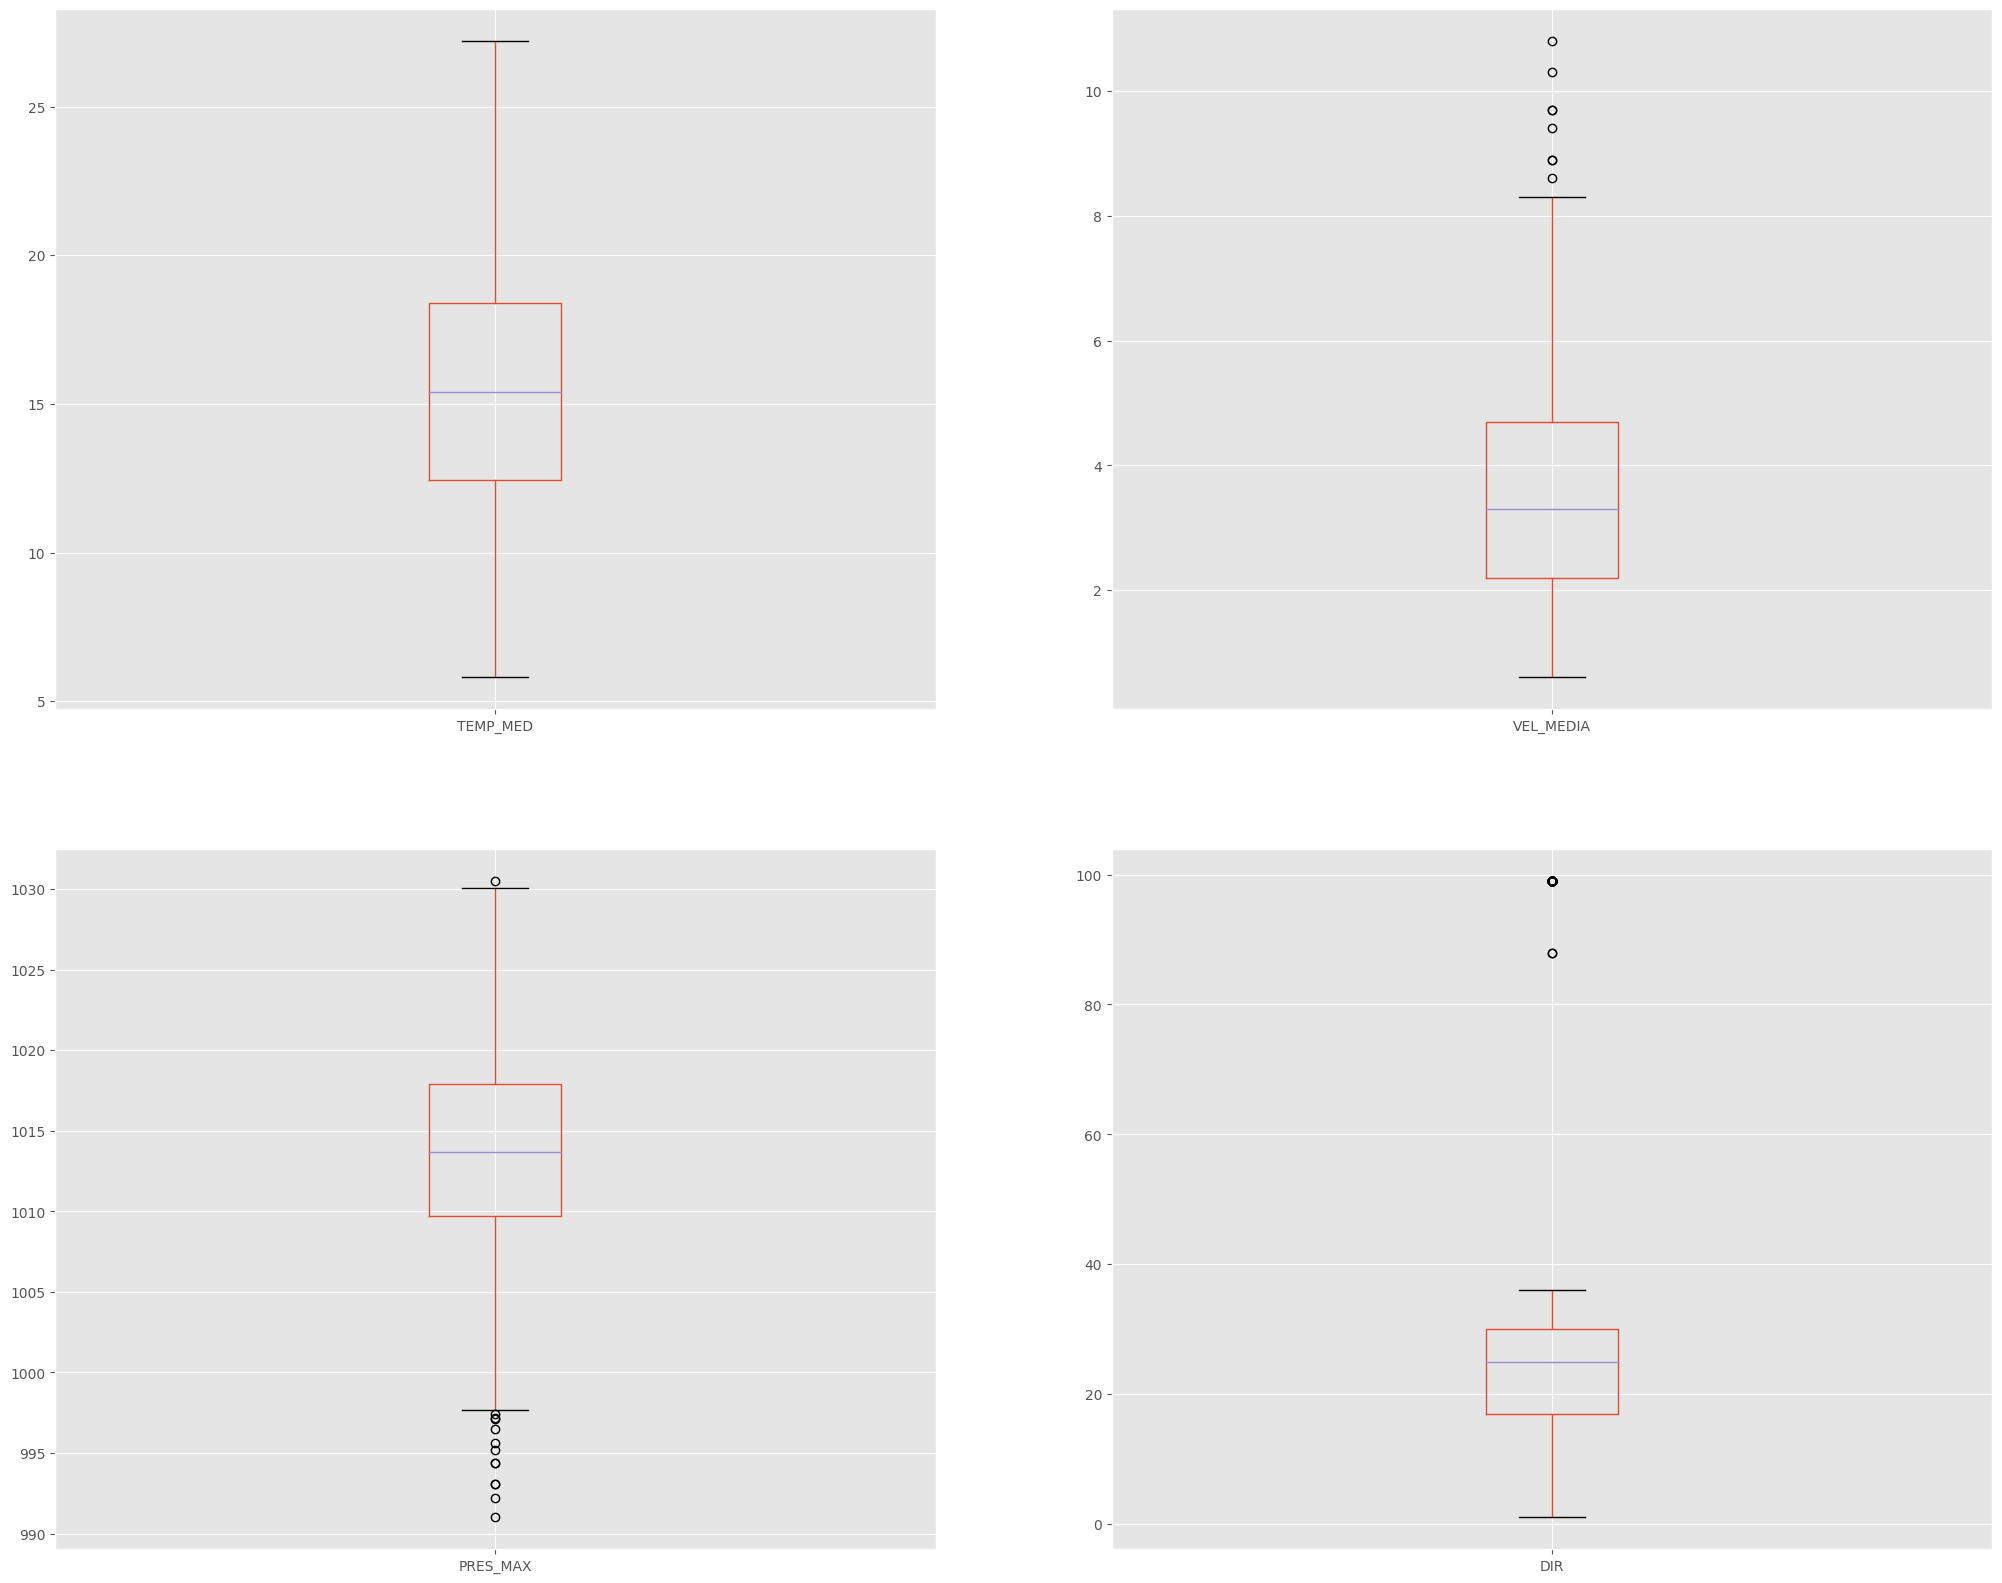

In [35]:
plt.figure(figsize=(25, 20))

axa = plt.subplot(221)
df.boxplot(column=['TEMP_MED'])

axb = plt.subplot(222)
df.boxplot(column=['VEL_MEDIA'])

axc = plt.subplot(223)
df.boxplot(column=['PRES_MAX'])

axd = plt.subplot(224)
df.boxplot(column=['DIR'])

In [ ]:
plt.figure(figsize=(25, 20))

axa = plt.subplot(221)
df.boxplot(column=['TEMP_MED'])

axb = plt.subplot(222)
df.boxplot(column=['VEL_MEDIA'])

axc = plt.subplot(223)
df.boxplot(column=['PRES_MAX'])

axd = plt.subplot(224)
df.boxplot(column=['DIR'])

# DATOS INNECESARIOS


## Tipo: Desinformativo / Repetitivo

Las siguientes variable **INDICATIVO**, **NOMBRE** tienen un campo con más del 50% de los datos ademas de que es una columna desinformativa, la primera hace referencia al código de la estación metereologica y la segunda al nombre de la estación metereologica.

In [36]:
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.5:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

INDICATIVO: 100.00000%
1387    1155
Name: INDICATIVO, dtype: int64

NOMBRE: 100.00000%
A CORUÑA    1155
Name: NOMBRE, dtype: int64

PROVINCIA: 100.00000%
A CORUÑA    1155
Name: PROVINCIA, dtype: int64

ALTITUD: 100.00000%
58    1155
Name: ALTITUD, dtype: int64

PREC: 56.45022%
0.0     652
0.4      36
0.2      34
0.8      23
1.0      20
       ... 
45.4      1
22.8      1
28.8      1
19.6      1
22.0      1
Name: PREC, Length: 115, dtype: int64



In [37]:
df = df.drop(columns=['INDICATIVO', 'NOMBRE'])

## Tipo: Duplicados

No existen registros duplicados ya que se eliminaron al comienzo cuando se creo el dataframe.

# DATOS INCONSISTENTES

## Capitalization

Para evitar que existan palabras distintas y que simbolicen el mismo significado solo por el hecho de estar en minuscula o mayusculas, para todas las variables tipo string las pasaremos a mayuscula, ya que por defecto todas viene así, también elimnaremos los espacios al principio y al final.

In [39]:
col_str = ['PROVINCIA', 'HORA_TEMP_MIN', 'HORA_TEMP_MAX', 'HORA_RACHA', 'HORA_PRES_MAX', 'HORA_PRES_MIN']
for x in col_str:
  df[x] = df[x].str.upper()
  df[x] = df[x].str.strip()

# **CONCLUSIÓN** ✅




Tras realizar todos los pasos, pruebas de exploración, tratamiento y limpieza de datos en comparación con el set de datos inicial, los datos se ven de la siguiente forma:

In [ ]:
df.head(5)

In [41]:
df.shape

(1155, 18)

Se paso de: 

**1155** registros y **20** columnas 

a:

 **1155** registros y **18** columnas

Se exporta el dataframe final a un archivo parquet el cual es comprimido, y la lectura es mucho más rápida, esto se hace con el fin de al momento de empezar con nuestro analisis o modelos, tengamos como punto de partida este archivo de salida totalmente limpio, a continuación la exportación final:   

In [ ]:
#df.to_parquet(path = 'DF_COVID', engine = 'auto', compression ='snappy', index=None)

In [ ]:
df.to_csv('data_covid.csv', index=False)

Se realiza un perfilamiento por medio de pandas-profiling de este archivo para su comparación con el generado inicialmente, también se añade a la entrega.
El perfilamiento no se hace en este notebook ya que por temas de memoría utilizado a lo largo de todo el proceso el google colab casi llega a su limite, pero el proceso es exactamente el mismo del comienzo:

In [ ]:
#parquet_crime = pd.read_parquet(path = '/content/drive/My Drive/Colab Notebooks/VIU/05MBID_Mineria_Datos/DF_CRIME_PARQUET', engine = 'auto')

In [ ]:
#profilefinal = ProfileReport(parquet_crime, minimal=True)
#profilefinal.to_file(output_file="crime_profile_final.html")

# **FIN** 🙂

In [49]:
print(result.head())

Empty DataFrame
Columns: []
Index: []


In [96]:
path

'c:/Users/Asus/Documents/Repositorios/TFM/Data/Data_Climatologica/Diaria/'

In [102]:
dir_list = os.listdir(path)
result = pd.DataFrame()
for i in dir_list:
    dfi = pd.read_json(path + i, encoding="latin")
    result = pd.concat([result, dfi], ignore_index=True)
    

In [103]:
result.columns

Index(['fecha', 'indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec',
       'tmin', 'horatmin', 'tmax', 'horatmax', 'dir', 'velmedia', 'racha',
       'horaracha', 'presMax', 'horaPresMax', 'presMin', 'horaPresMin', 'sol'],
      dtype='object')

In [104]:
result.columns = ['FECHA', 'INDICATIVO', 'NOMBRE', 'PROVINCIA', 'ALTITUD', 'TEMP_MED', 'PREC', 'TEMP_MIN', 'HORA_TEMP_MIN',
              'TEMP_MAX', 'HORA_TEMP_MAX', 'DIR', 'VEL_MEDIA', 'RACHA', 'HORA_RACHA', 'PRES_MAX', 'HORA_PRES_MAX', 
              'PRES_MIN', 'HORA_PRES_MIN', 'SOL']

In [105]:
result.fillna(method="ffill", inplace=True)
result.fillna(method="bfill", inplace=True)
result['PREC'] = result['PREC'].replace(['Ip'], '0,0')

In [106]:
result.mode().iloc[0]

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:968: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn(f"Unable to sort modes: {err}")


FECHA            2020-01-01
INDICATIVO            8178D
NOMBRE             A CORUÑA
PROVINCIA          A CORUÑA
ALTITUD                 4.0
TEMP_MED               12,2
PREC                    0,0
TEMP_MIN                9,4
HORA_TEMP_MIN         23:59
TEMP_MAX               16,6
HORA_TEMP_MAX         15:00
DIR                    99.0
VEL_MEDIA               2,2
RACHA                   8,3
HORA_RACHA           Varias
PRES_MAX             1014,7
HORA_PRES_MAX        Varias
PRES_MIN             1012,2
HORA_PRES_MIN            17
SOL                     0,0
Name: 0, dtype: object

In [88]:
result['PRES_MAX'].unique()

array(['954,2', '953,6', '954,3', ..., '880,8', '885,8', '876,4'],
      dtype=object)

In [107]:
result["FECHA"] = pd.to_datetime(result["FECHA"])
result["TEMP_MED"] = result["TEMP_MED"].str.replace(",",".").astype(float)
result["PREC"] = result["PREC"].str.replace(",",".").astype(float)
result["TEMP_MIN"] = result["TEMP_MIN"].str.replace(",",".").astype(float)
result["TEMP_MAX"] = result["TEMP_MAX"].str.replace(",",".").astype(float)
result["VEL_MEDIA"] = result["VEL_MEDIA"].str.replace(",",".").astype(float)
result["RACHA"] = result["RACHA"].str.replace(",",".").astype(float)
result["SOL"] = result["SOL"].str.replace(",",".").astype(float)
result["PRES_MAX"] = result["PRES_MAX"].str.replace(",",".").astype(float)
result["PRES_MIN"] = result["PRES_MIN"].str.replace(",",".").astype(float)

In [127]:
result = result.drop(columns=['INDICATIVO', 'NOMBRE'])

In [54]:
result.shape

(60013, 27)

In [108]:
for col in result.columns:
    pct_missing = np.mean(result[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 7)))

FECHA - 0.0%
INDICATIVO - 0.0%
NOMBRE - 0.0%
PROVINCIA - 0.0%
ALTITUD - 0.0%
TEMP_MED - 0.0%
PREC - 0.0%
TEMP_MIN - 0.0%
HORA_TEMP_MIN - 0.0%
TEMP_MAX - 0.0%
HORA_TEMP_MAX - 0.0%
DIR - 0.0%
VEL_MEDIA - 0.0%
RACHA - 0.0%
HORA_RACHA - 0.0%
PRES_MAX - 0.0%
HORA_PRES_MAX - 0.0%
PRES_MIN - 0.0%
HORA_PRES_MIN - 0.0%
SOL - 0.0%


In [109]:
result.dtypes

FECHA            datetime64[ns]
INDICATIVO               object
NOMBRE                   object
PROVINCIA                object
ALTITUD                   int64
TEMP_MED                float64
PREC                    float64
TEMP_MIN                float64
HORA_TEMP_MIN            object
TEMP_MAX                float64
HORA_TEMP_MAX            object
DIR                     float64
VEL_MEDIA               float64
RACHA                   float64
HORA_RACHA               object
PRES_MAX                float64
HORA_PRES_MAX            object
PRES_MIN                float64
HORA_PRES_MIN            object
SOL                     float64
dtype: object

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<Axes: >

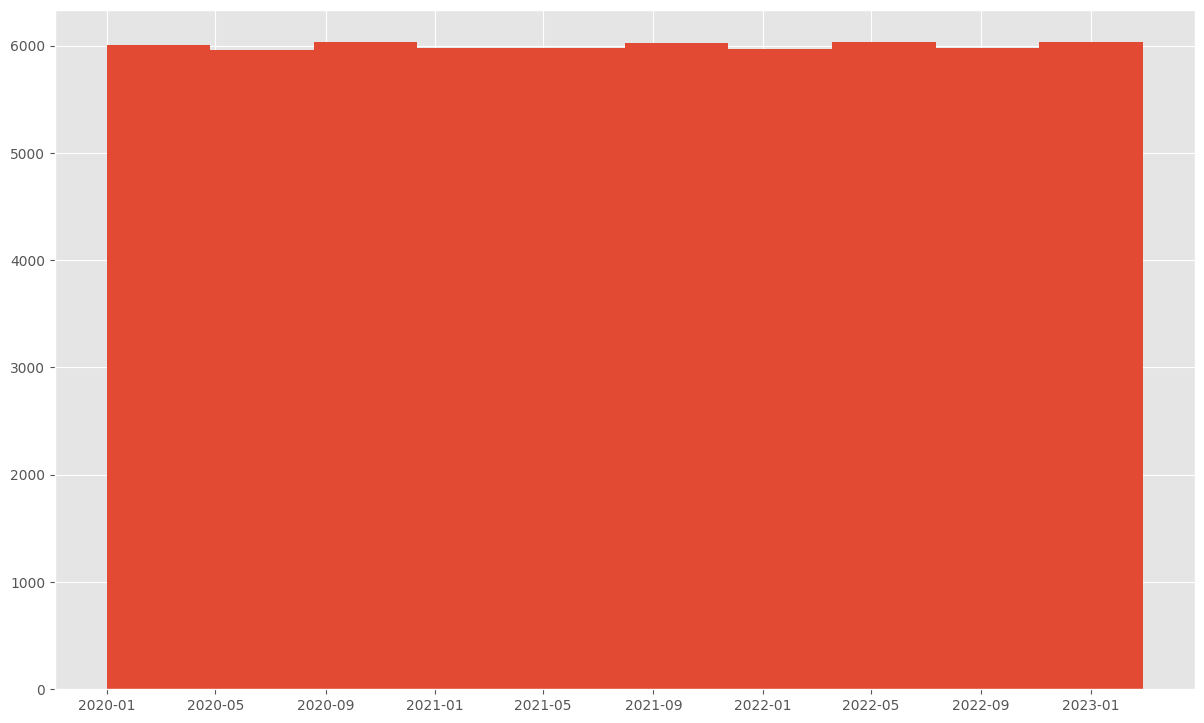

In [110]:
%pylab inline
plt.figure(figsize=(50, 30))

ax1 = plt.subplot(331)
result['FECHA'].hist(bins=10)

In [111]:
result['PROVINCIA'].unique()

array(['ALBACETE', 'ALICANTE', 'ALMERIA', 'ARABA/ALAVA', 'ASTURIAS',
       'AVILA', 'A CORUÑA', 'BADAJOZ', 'BARCELONA', 'BIZKAIA', 'BURGOS',
       'CACERES', 'CADIZ', 'CANTABRIA', 'CASTELLON', 'CEUTA',
       'CIUDAD REAL', 'CORDOBA', 'CUENCA', 'GIPUZKOA', 'GIRONA',
       'GRANADA', 'GUADALAJARA', 'HUELVA', 'HUESCA', 'ILLES BALEARS',
       'JAEN', 'LAS PALMAS', 'LA RIOJA', 'LEON', 'LLEIDA', 'LUGO',
       'MADRID', 'MALAGA', 'MELILLA', 'MURCIA', 'NAVARRA', 'OURENSE',
       'PALENCIA', 'PONTEVEDRA', 'SALAMANCA', 'SEGOVIA', 'SEVILLA',
       'SORIA', 'STA. CRUZ DE TENERIFE', 'TARRAGONA', 'TERUEL', 'TOLEDO',
       'VALENCIA', 'VALLADOLID', 'ZAMORA', 'ZARAGOZA'], dtype=object)

In [112]:
len(result['PROVINCIA'].unique())

52

<Axes: >

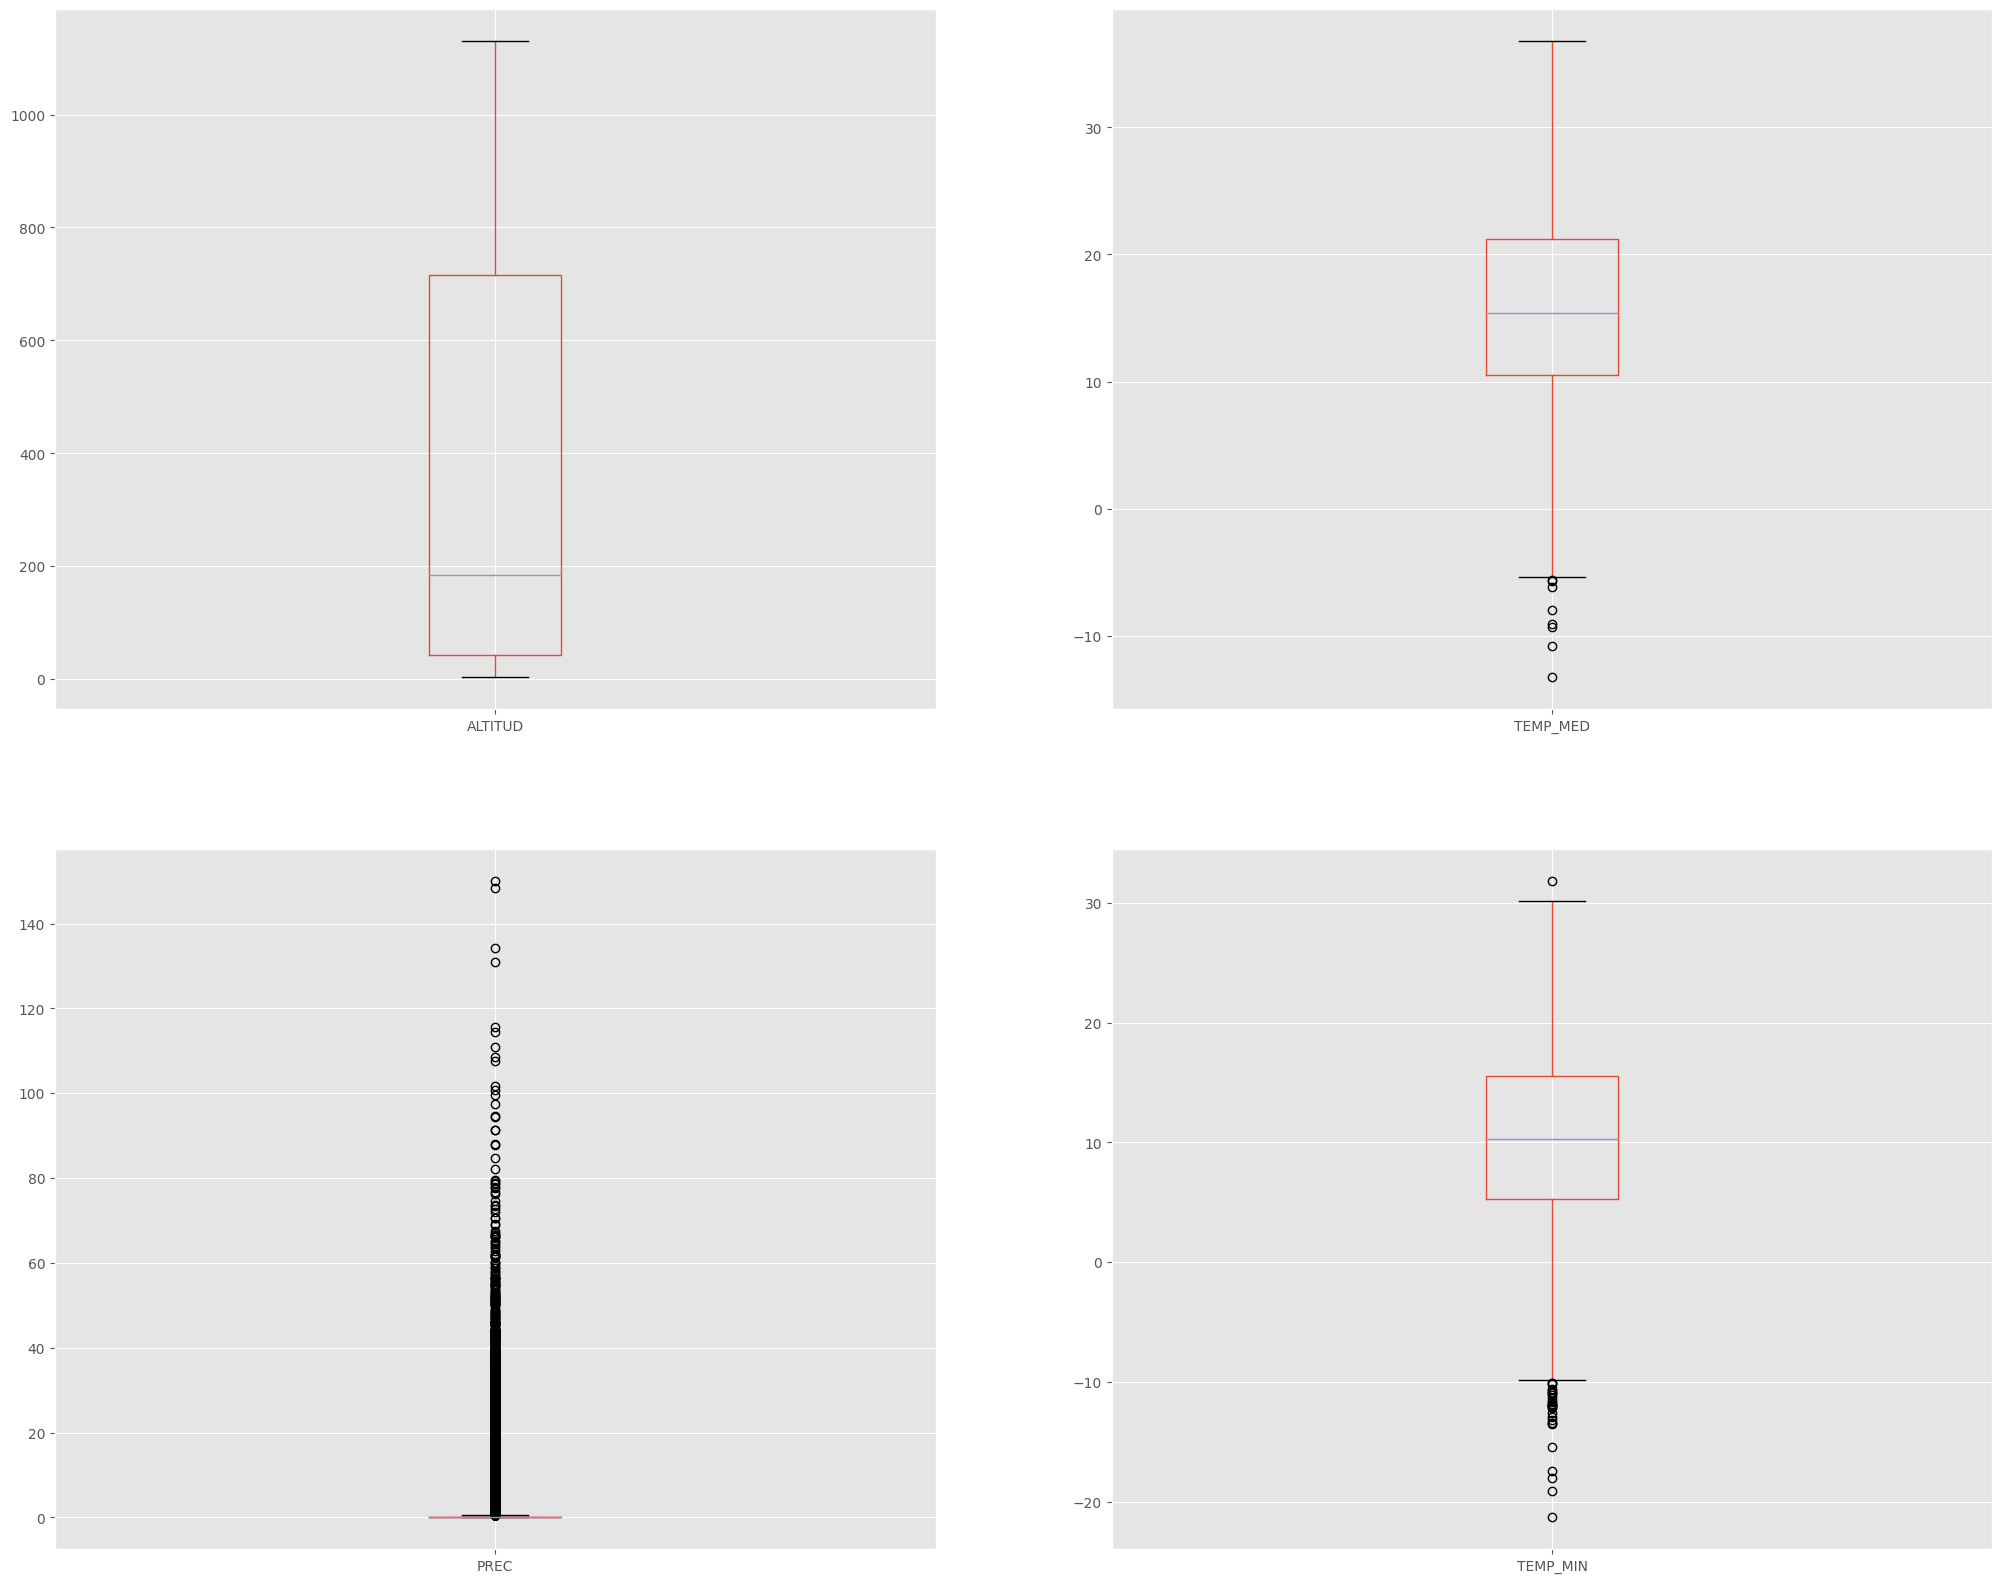

In [114]:
plt.figure(figsize=(25, 20))

axa = plt.subplot(221)
result.boxplot(column=['ALTITUD'])

axb = plt.subplot(222)
result.boxplot(column=['TEMP_MED'])

axc = plt.subplot(223)
result.boxplot(column=['PREC'])

axd = plt.subplot(224)
result.boxplot(column=['TEMP_MIN'])

<Axes: >

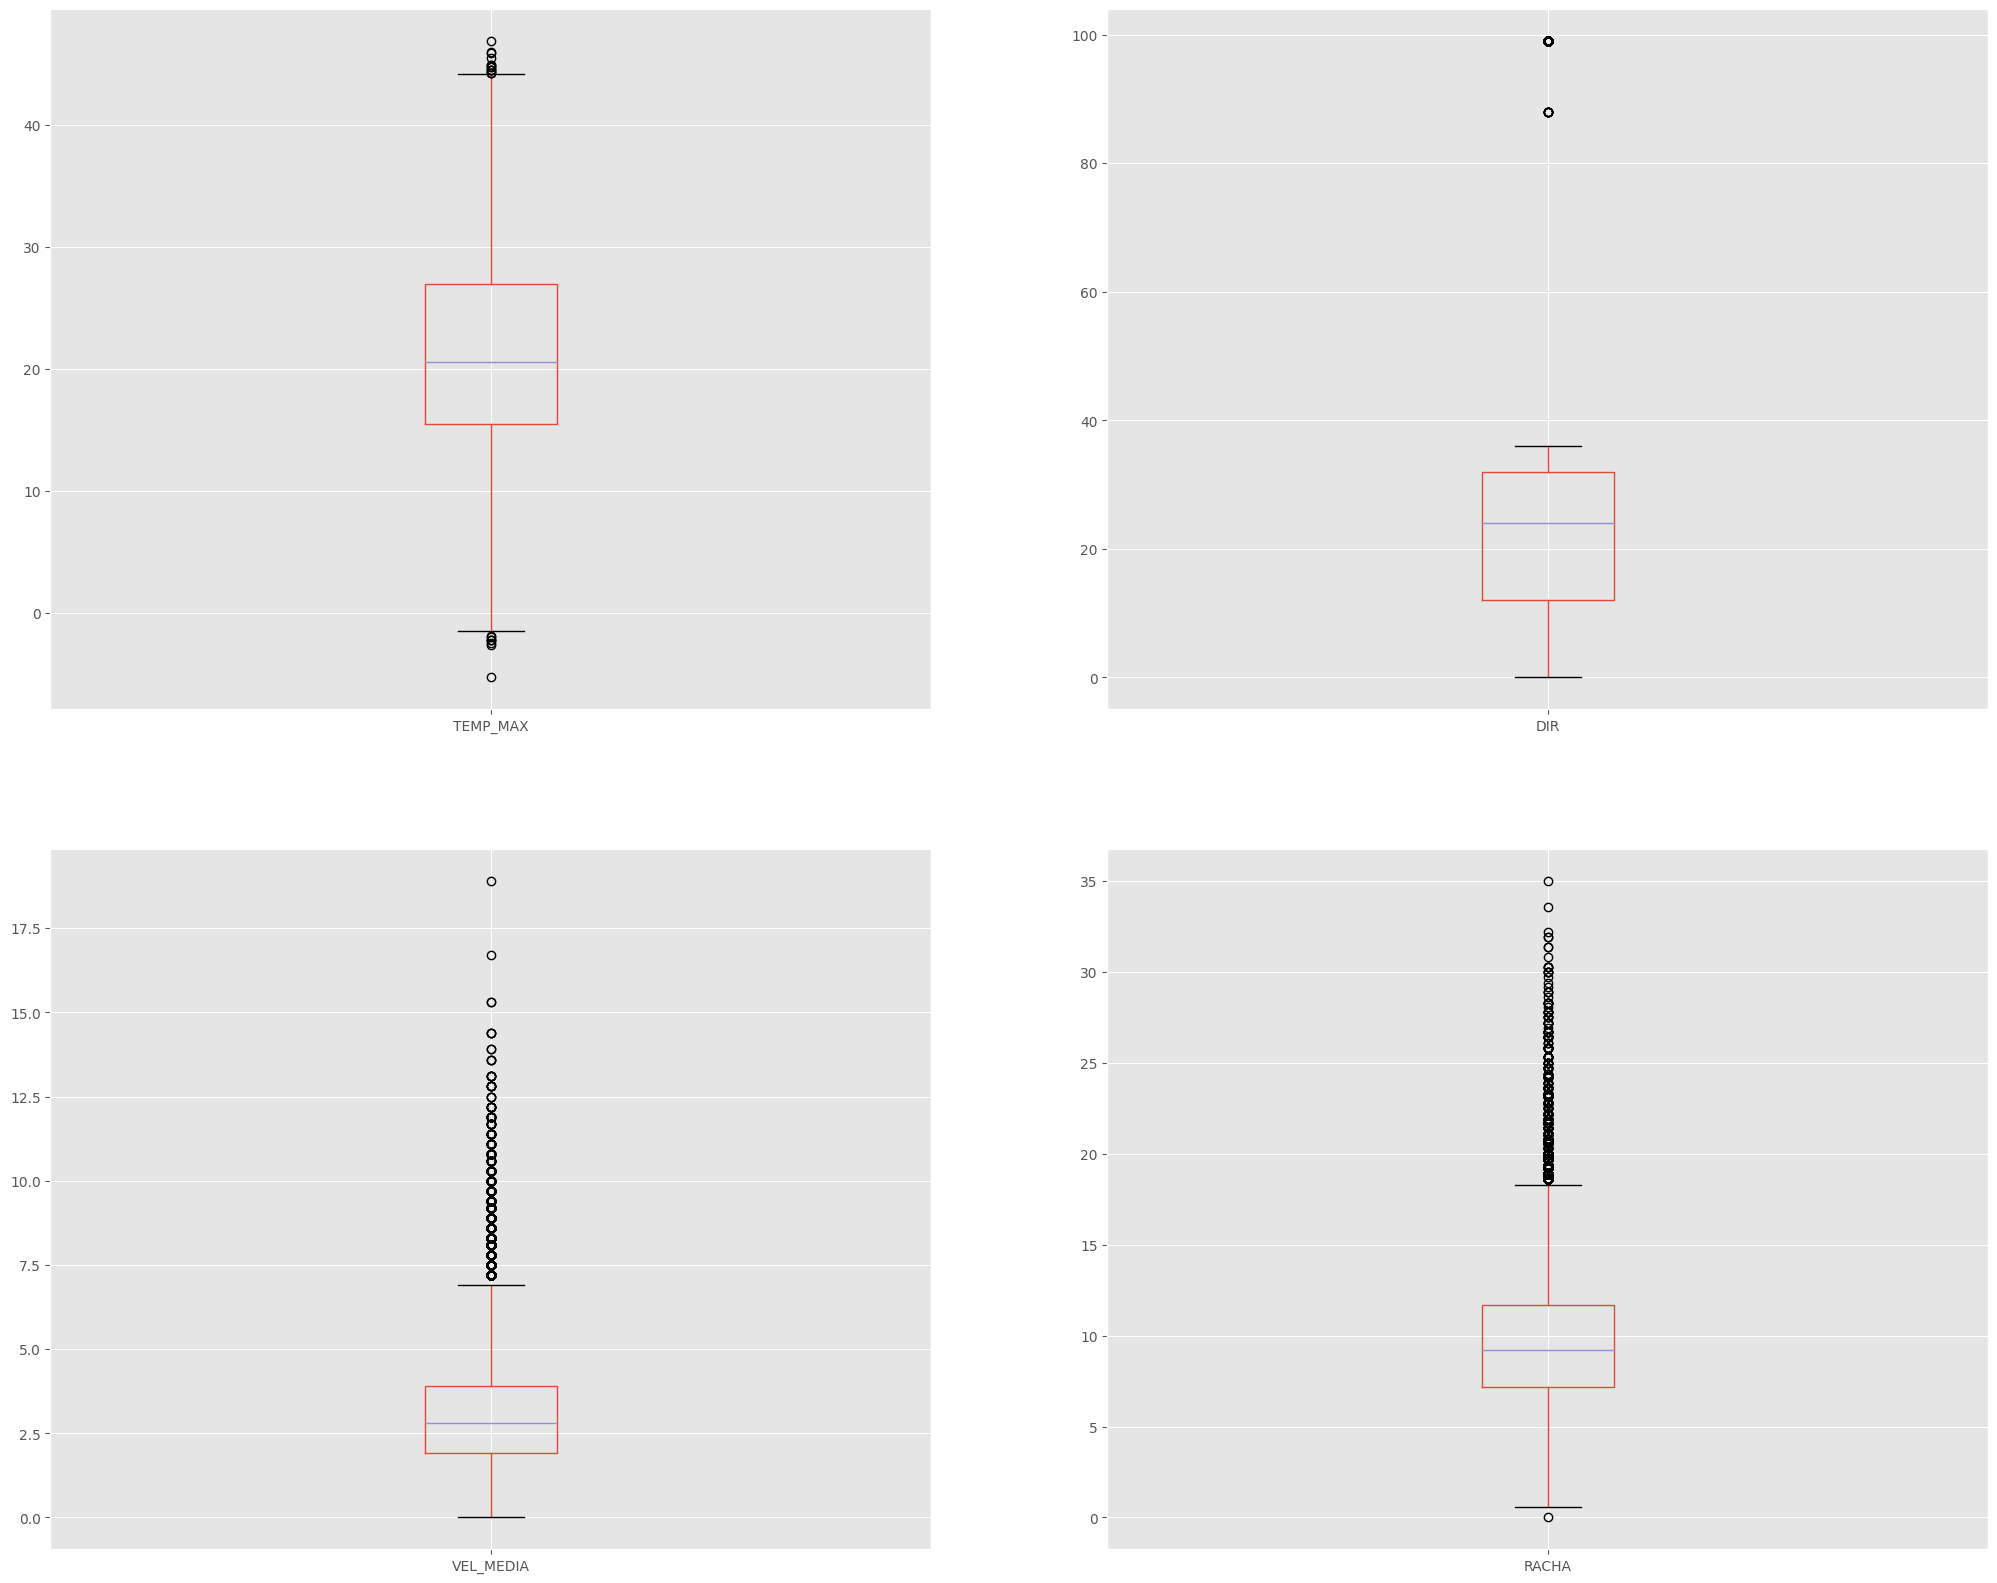

In [115]:
plt.figure(figsize=(25, 20))

axa = plt.subplot(221)
result.boxplot(column=['TEMP_MAX'])

axb = plt.subplot(222)
result.boxplot(column=['DIR'])

axc = plt.subplot(223)
result.boxplot(column=['VEL_MEDIA'])

axd = plt.subplot(224)
result.boxplot(column=['RACHA'])

<Axes: >

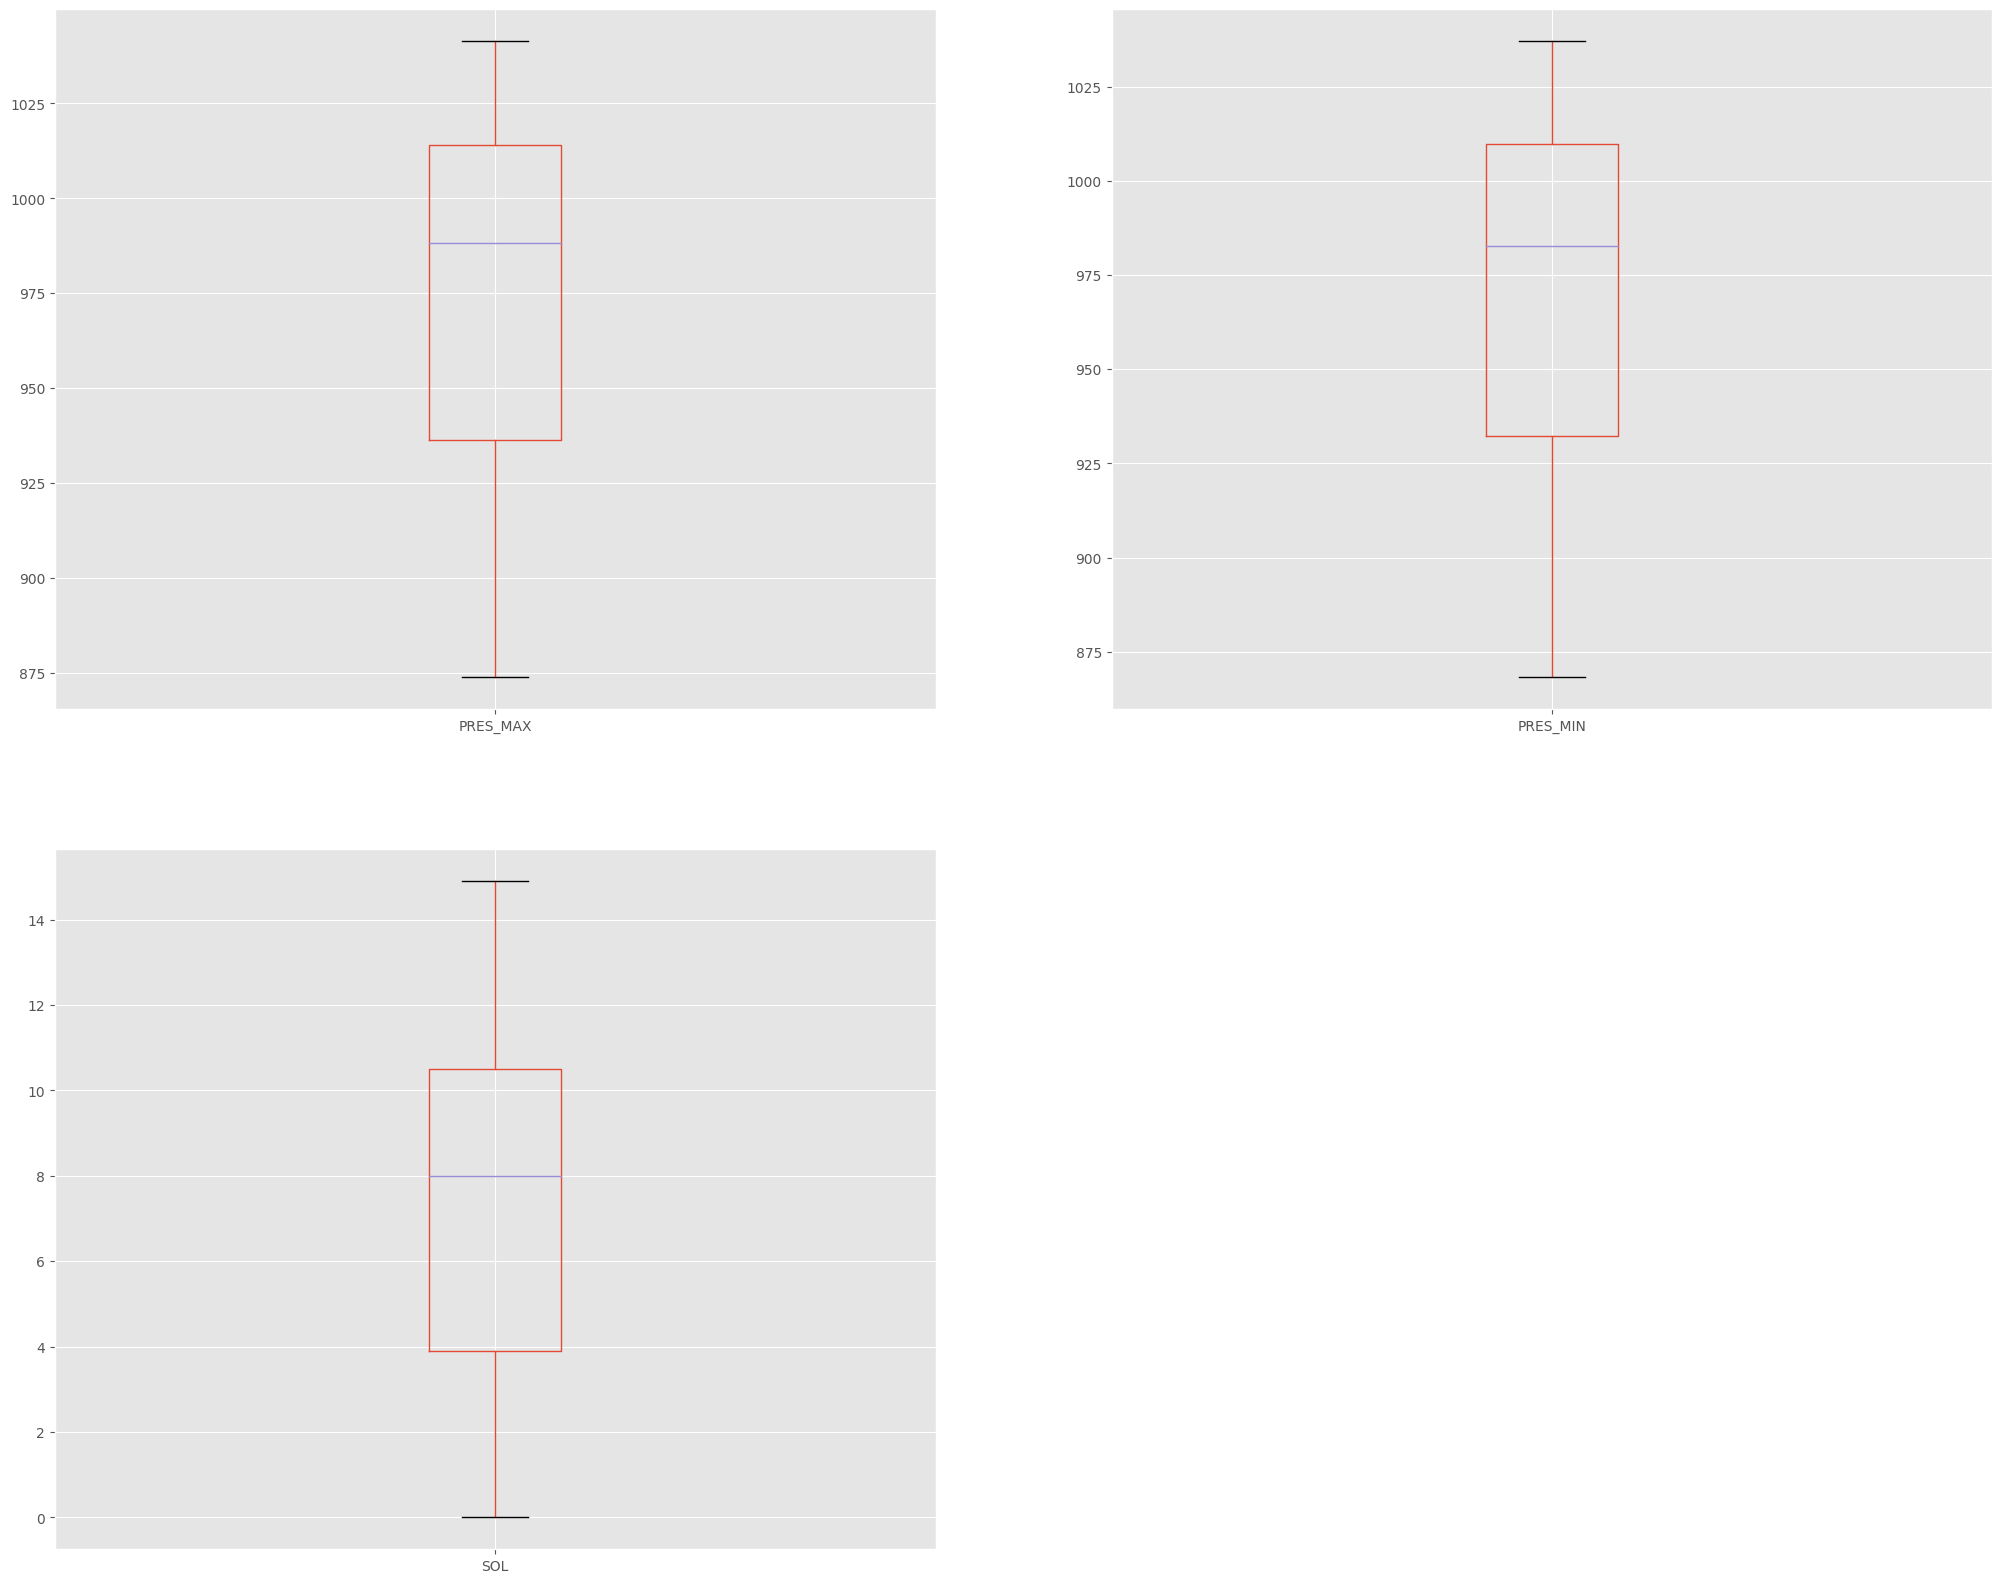

In [116]:
plt.figure(figsize=(25, 20))

axa = plt.subplot(221)
result.boxplot(column=['PRES_MAX'])

axb = plt.subplot(222)
result.boxplot(column=['PRES_MIN'])

axc = plt.subplot(223)
result.boxplot(column=['SOL'])

In [122]:
result['HORA_TEMP_MIN'].unique()

array(['23:50', '06:27', '08:10', ..., '18:48', '10:29', '15:20'],
      dtype=object)

In [126]:
result

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TEMP_MED,PREC,TEMP_MIN,HORA_TEMP_MIN,TEMP_MAX,HORA_TEMP_MAX,DIR,VEL_MEDIA,RACHA,HORA_RACHA,PRES_MAX,HORA_PRES_MAX,PRES_MIN,HORA_PRES_MIN,SOL
0,2020-01-01,8178D,ALBACETE,ALBACETE,674,6.2,0.0,-0.1,23:50,12.4,15:39,26.0,0.0,2.8,03:30,954.2,11,952.0,17,6.7
1,2020-01-02,8178D,ALBACETE,ALBACETE,674,5.7,0.0,-3.3,06:27,14.7,15:21,8.0,0.0,2.2,Varias,953.6,10,951.5,15,6.7
2,2020-01-03,8178D,ALBACETE,ALBACETE,674,5.6,0.0,-0.3,08:10,11.5,13:20,28.0,1.1,6.7,14:35,954.3,24,952.2,14,7.9
3,2020-01-04,8178D,ALBACETE,ALBACETE,674,7.0,0.0,1.8,23:59,12.1,15:10,99.0,0.3,3.9,Varias,954.8,11,952.3,14,7.9
4,2020-01-05,8178D,ALBACETE,ALBACETE,674,6.6,0.0,-0.9,06:00,14.2,15:30,22.0,0.3,2.5,00:40,952.6,00,949.4,18,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59988,2023-02-24,9394X,CALATAYUD,ZARAGOZA,582,4.8,0.0,-0.8,08:00,10.5,16:20,27.0,1.4,7.8,14:00,944.0,08,939.4,Varias,8.5
59989,2023-02-25,9394X,CALATAYUD,ZARAGOZA,582,4.4,0.0,-3.3,07:40,12.0,15:40,26.0,1.9,11.1,15:10,940.4,00,935.3,15,7.5
59990,2023-02-26,9394X,CALATAYUD,ZARAGOZA,582,4.7,0.0,-0.5,05:00,9.9,15:30,31.0,4.2,14.7,17:40,942.8,Varias,937.1,14,6.3
59991,2023-02-27,9394X,CALATAYUD,ZARAGOZA,582,-1.9,0.2,-4.8,23:59,1.0,17:00,1.0,4.2,13.9,01:10,949.0,24,942.8,00,0.2
